# Pyber 

### Loading & Reading CSV files

In [247]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [248]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [249]:
#  1. Get the total rides for each city type
city_type_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_type_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [250]:
# 2. Get the total drivers for each city type
city_type_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
city_type_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [251]:
#  3. Get the total amount of fares for each city type
city_type_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
city_type_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [252]:
#  4. Get the average fare per ride for each city type. 
average_fare_ride = city_type_fares / city_type_rides
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [253]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = city_type_fares / city_type_drivers
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [254]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame ({"Total Rides" : city_type_rides,
               "Total Drivers": city_type_drivers,
               "Total Fares": city_type_fares,
                "Average Fare per Ride" : average_fare_ride,
                 "Average Fare per Driver" : average_fare_driver})

summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [255]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None

In [256]:
#  8. Format the columns.
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)


summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [257]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


In [271]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df['date']=pd.to_datetime(pyber_data_df['date'])

fare_sum_by_day = pyber_data_df.groupby(['type','date']).sum()['fare']
fare_sum_by_day

type   date               
Rural  2019-01-01 09:45:00    43.69
       2019-01-02 11:18:00    52.12
       2019-01-03 19:51:00    19.90
       2019-01-04 03:31:00    24.88
       2019-01-06 07:38:00    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:00    18.45
       2019-05-08 07:29:00    18.55
       2019-05-08 11:38:00    19.77
       2019-05-08 13:10:00    18.04
Name: fare, Length: 2364, dtype: float64

In [272]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_sum_by_day = fare_sum_by_day.reset_index()
fare_sum_by_day.head()

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33


In [273]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_sum_day_pivot = fare_sum_by_day.pivot(index = 'date', columns = "type", values='fare')
fare_sum_day_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [274]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_apr_fare_by_day = fare_sum_day_pivot.loc["2019-01-01":"2019-04-28"]
jan_apr_fare_by_day.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [278]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
#Fixed error in previous STEP 2
# 7. Check that the datatype for the index is datetime using df.info()

jan_apr_fare_by_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [280]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan_apr_fare_by_wk = jan_apr_fare_by_day.resample('W').sum()
jan_apr_fare_by_wk.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


NameError: name 'mdates' is not defined

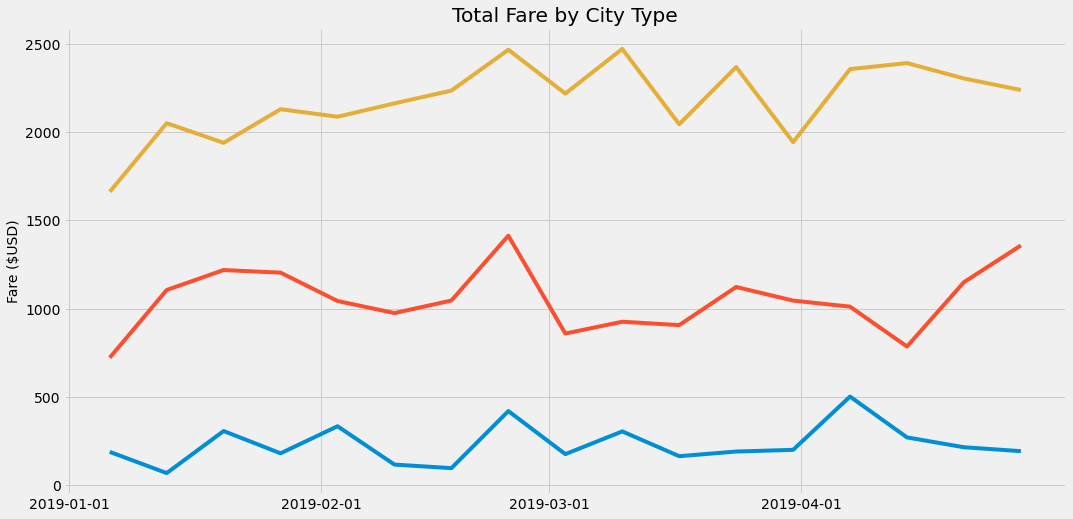

In [282]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(jan_apr_fare_by_wk)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xticks(pd.date_range(start = "2019-01-01", end = "2019-04-30", freq="MS"))
ax.set_title("Total Fare by City Type")

# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.legend(["Rural","Suburban","Urban"])